# **Cyclone Intensity Estimation using Deep Learning**

## METHOD - 1



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat_3d_ds - Sheet.csv")

img_name  label
0       25.jpg     25
1       27.jpg     27
2       28.jpg     28
3       30.jpg     30
4    30(1).jpg     30
..         ...    ...
131    112.jpg    112
132    115.jpg    115
133    118.jpg    118
134    119.jpg    119
135    128.jpg    128

[136 rows x 2 columns]

from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

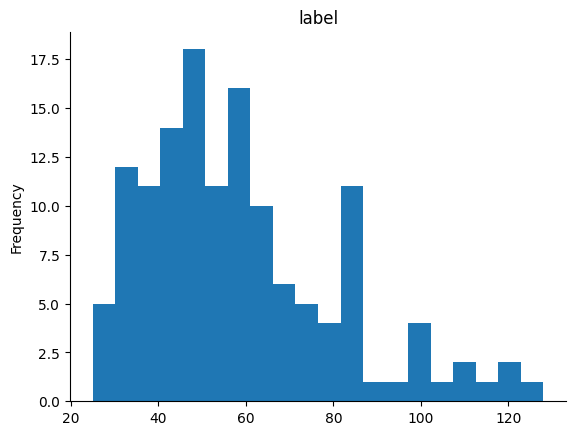

In [50]:
from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

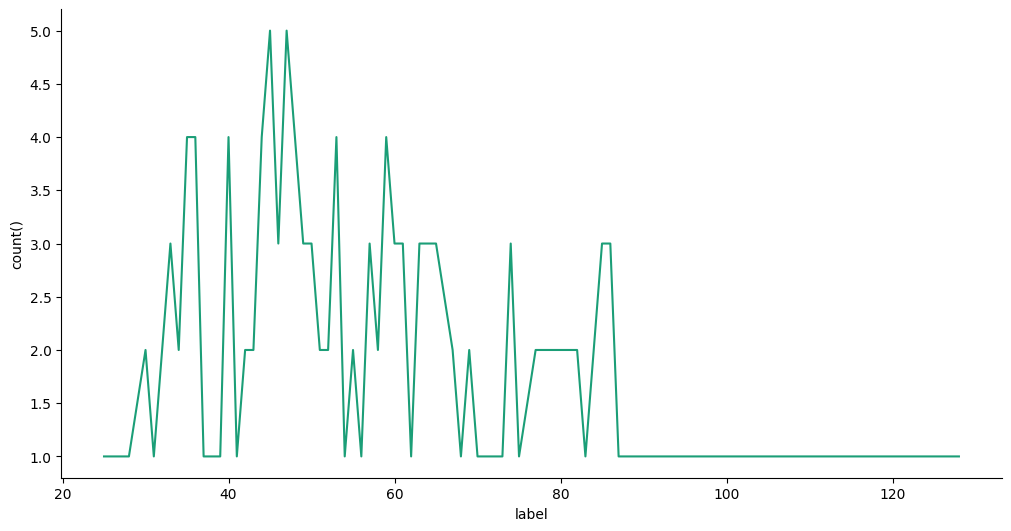

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds'.
There are 0 directories and 133 images in '/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'.


In [ ]:
os.mkdir("test_data")

In [4]:
import os
import shutil

source = '/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = '/content/drive/MyDrive/Dataset/test_data'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles[133:]:

    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)


In [5]:
#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds")
data_dir

PosixPath('/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds')

In [6]:
#Let visualise our images
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on

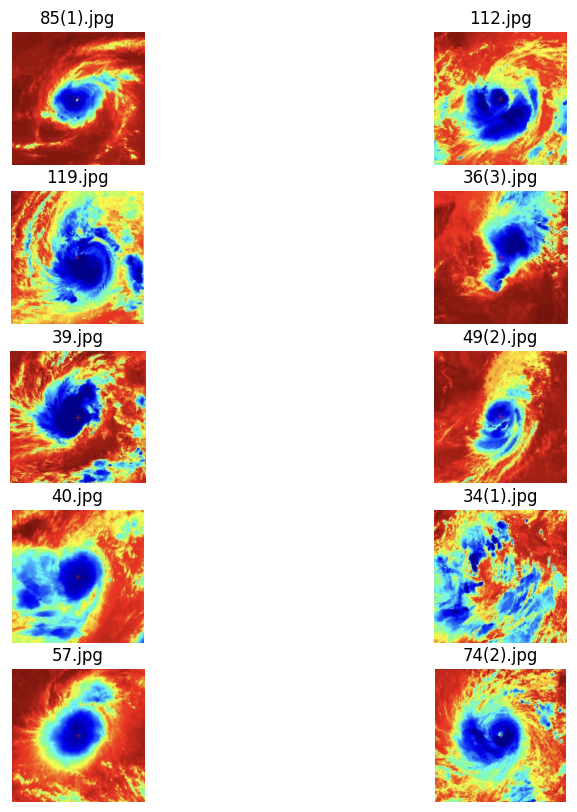

In [7]:
view_random_image("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

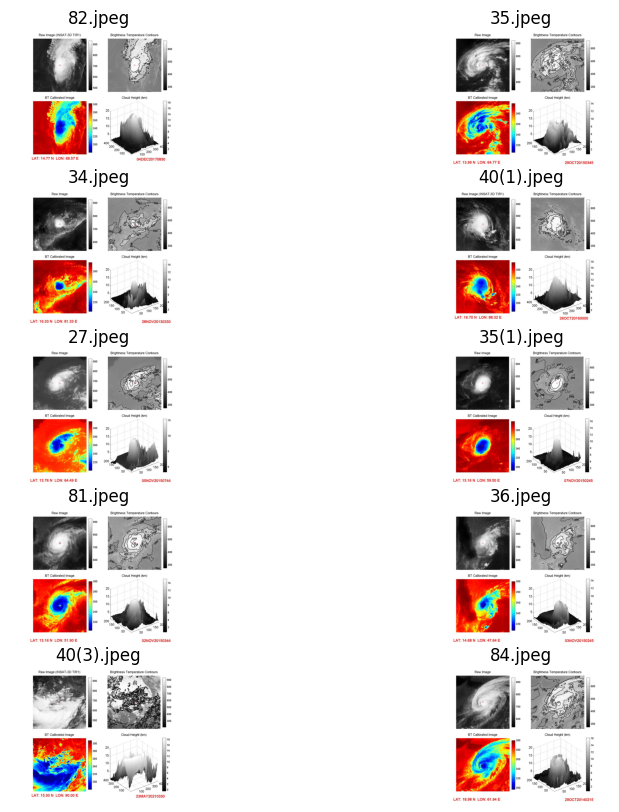

In [8]:
view_random_image("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_for_reference_ds/CYCLONE_DATASET")

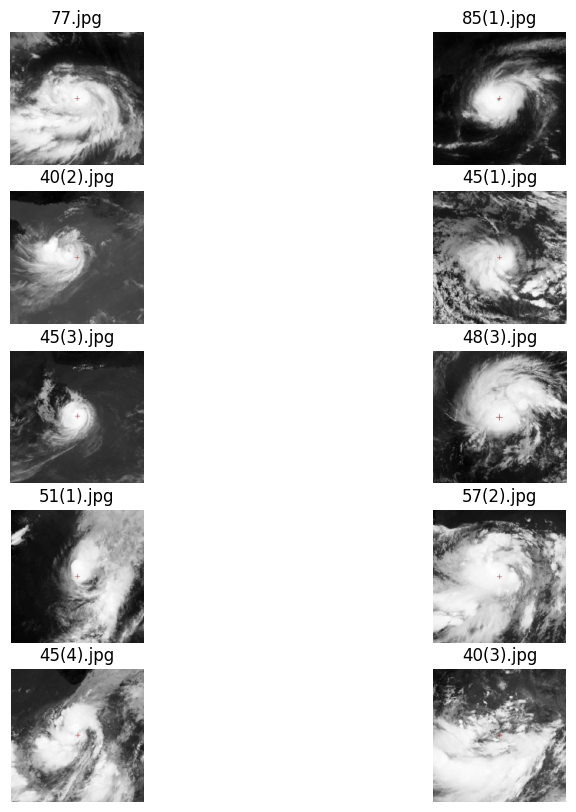

In [9]:
view_random_image("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL")

#Preprocess the data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat_3d_ds - Sheet.csv")

In [11]:
train_dir="/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


# CNN Model

In [12]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [13]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                            

In [14]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [22]:
history_1=model_1.fit(train_data,
                      epochs=100,callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 6s 686ms/step - loss: 408.7797 - mse: 15.7312
Epoch 2/100
9/9 [==============================] - 6s 685ms/step - loss: 410.9741 - mse: 20.7855
Epoch 3/100
9/9 [==============================] - 6s 687ms/step - loss: 401.1998 - mse: 13.6800
Epoch 4/100
9/9 [==============================] - 6s 694ms/step - loss: 395.8693 - mse: 11.2482
Epoch 5/100
9/9 [==============================] - 6s 697ms/step - loss: 406.3194 - mse: 24.5226
Epoch 6/100
9/9 [==============================] - 7s 701ms/step - loss: 399.3789 - mse: 20.1371
Epoch 7/100
9/9 [==============================] - 6s 706ms/step - loss: 391.8097 - mse: 15.4177
Epoch 8/100
9/9 [==============================] - 7s 710ms/step - loss: 385.2451 - mse: 11.7153
Epoch 9/100
9/9 [==============================] - 7s 711ms/step - loss: 384.4306 - mse: 13.6367
Epoch 10/100
9/9 [==============================] - 7s 713ms/step - loss: 379.6530 - mse: 11.6177
Epoch 11/100
9/9 [===========

# Method 1 loss :

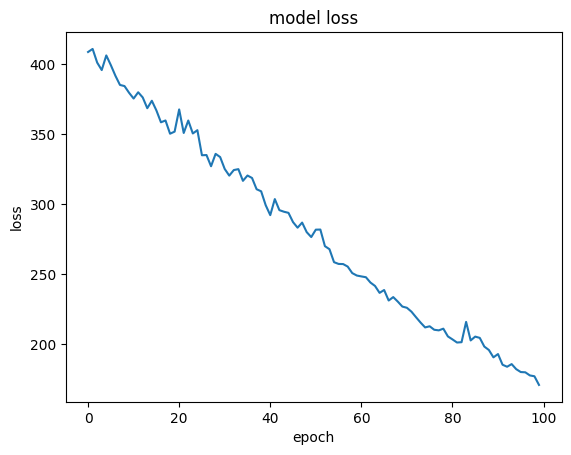

In [23]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [24]:
def load_and_prep_image(filename, img_shape=256):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

# Predictions

In [25]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 0s 29ms/step


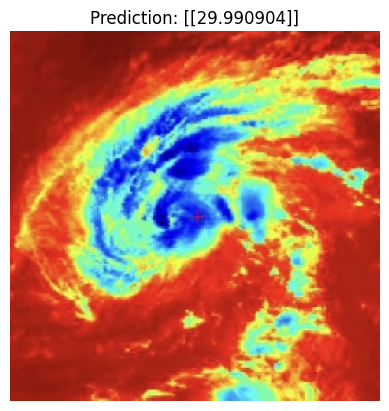

In [26]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/test_data/35.jpg")

1/1 [==============================] - 0s 18ms/step


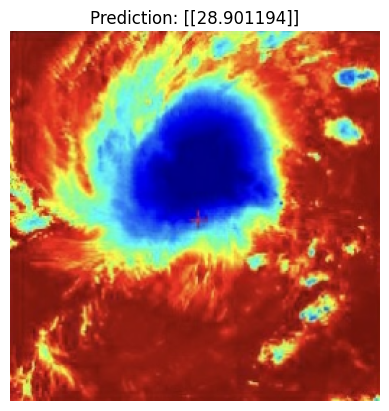

In [27]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/test_data/36(2).jpg")

1/1 [==============================] - 0s 26ms/step


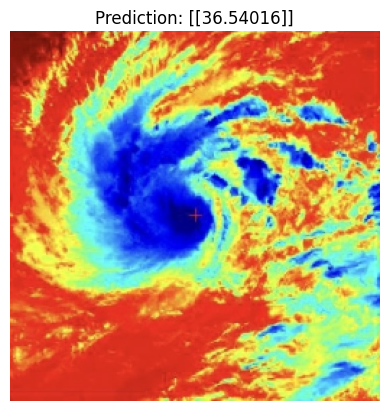

In [28]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/test_data/47(2).jpg")

1/1 [==============================] - 0s 20ms/step


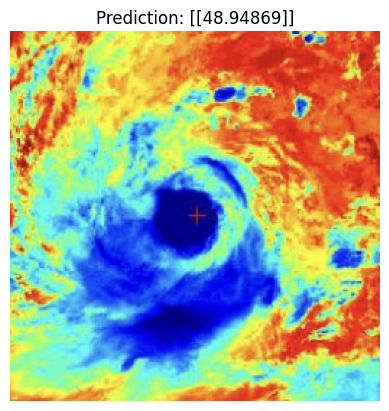

In [29]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/69(1).jpg")

1/1 [==============================] - 0s 136ms/step


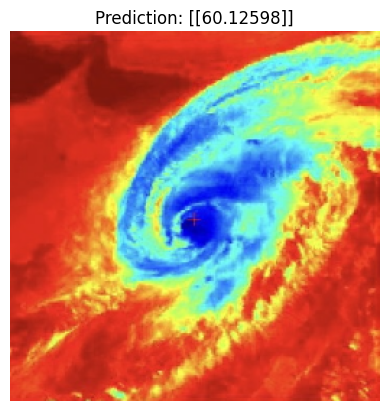

In [30]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/84(1).jpg")

1/1 [==============================] - 0s 35ms/step


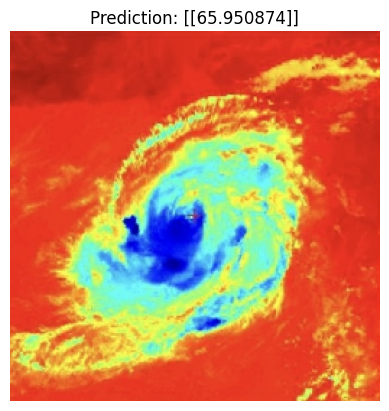

In [31]:
pred_and_plot(model_1,"/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/94.jpg")

# Saving the Model


In [32]:
import pickle
filename= "Trained_model.sav"
a=open(filename,'wb')
pickle.dump(model_1,a)
a.flush()
a.close()


In [33]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## METHOD - 2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,EfficientNetB4,Xception

import warnings
import glob
warnings.filterwarnings("ignore")

In [35]:
train = pd.read_csv("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat_3d_ds - Sheet.csv")

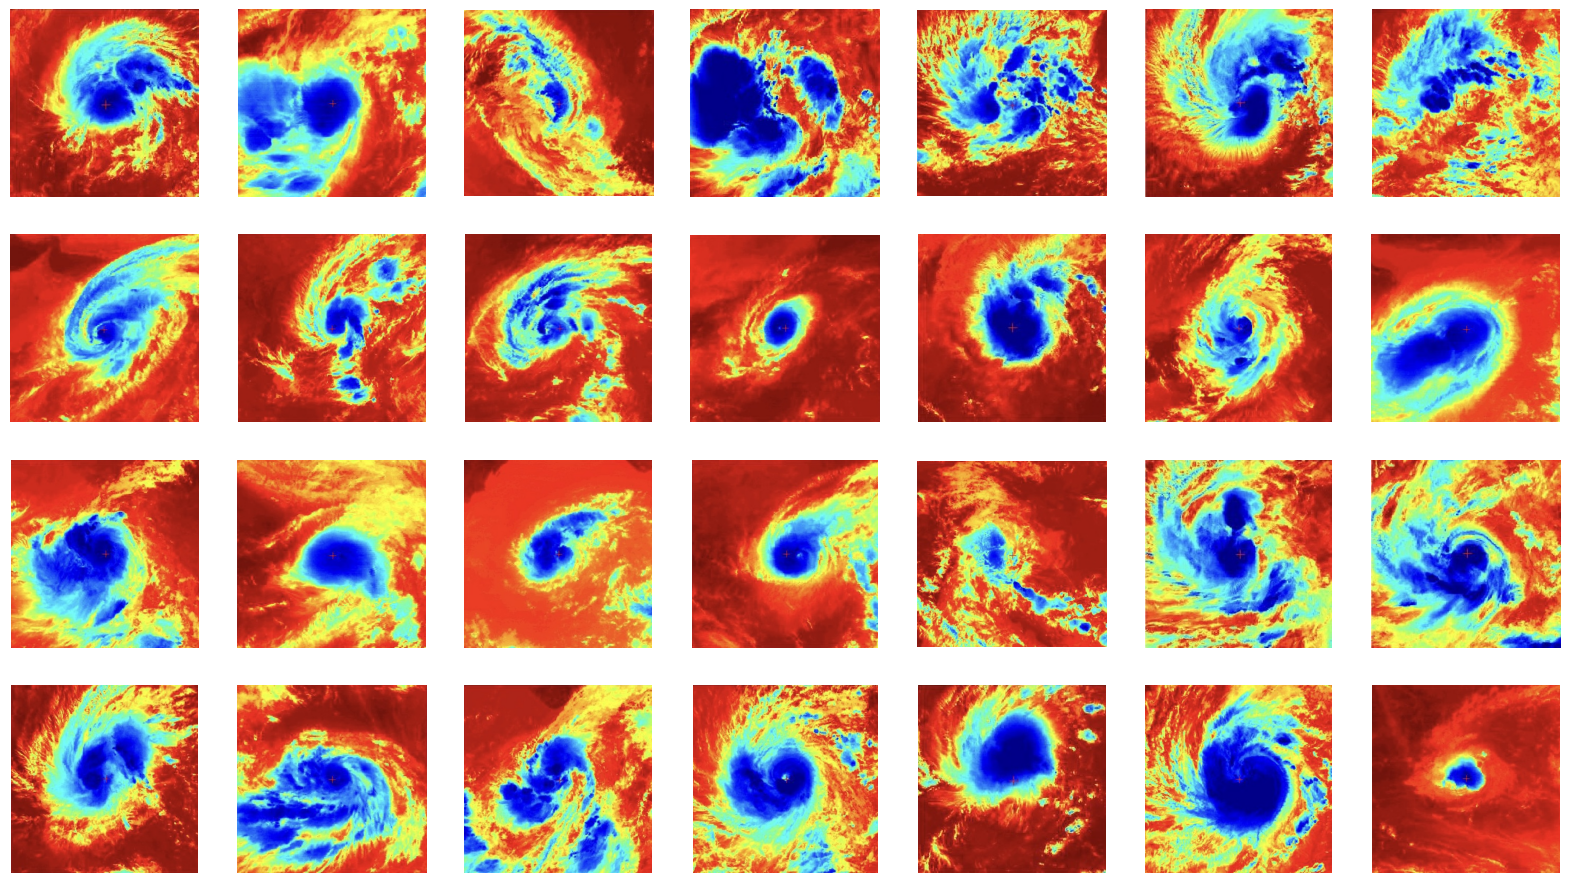

In [36]:
paths = glob.glob("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/*.jpg")
plt.figure(figsize=(20, 20))
for i in range(28):
    cur_img = mpimg.imread(paths[i])
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

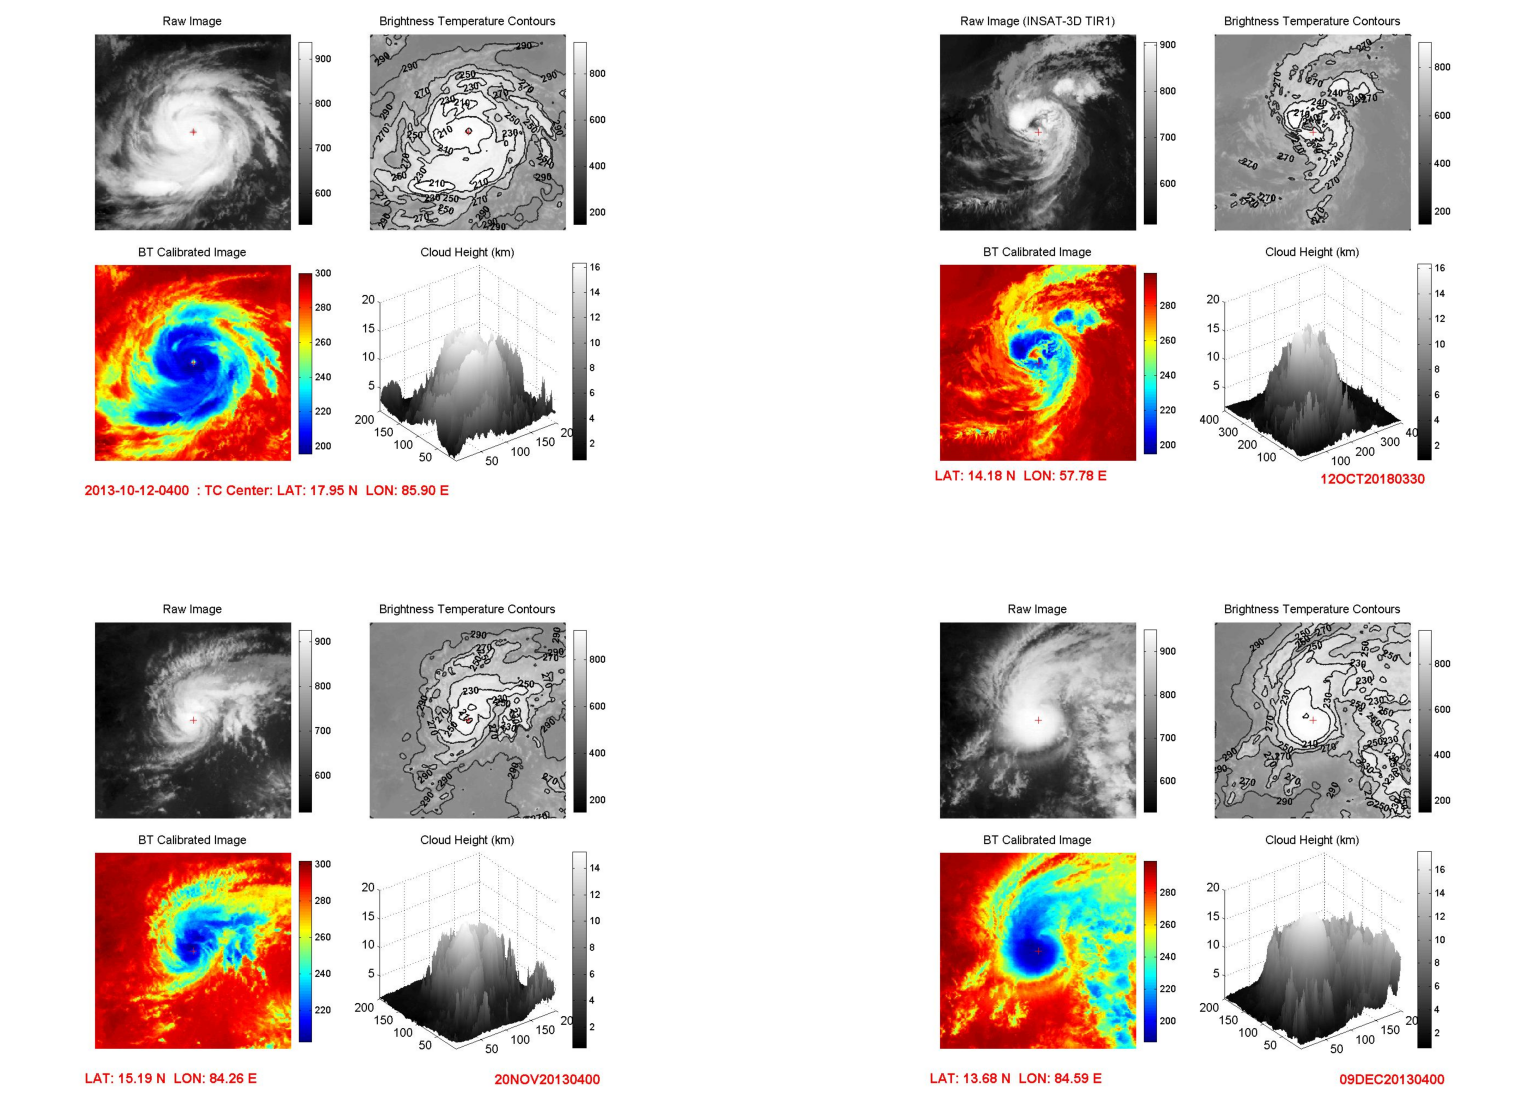

In [37]:
paths = glob.glob("/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_for_reference_ds/CYCLONE_DATASET/*.jpeg")
plt.figure(figsize=(20, 14))
for i in range(4):
    cur_img = mpimg.imread(paths[i])
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

In [38]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [39]:
train_data = train_datagen.flow_from_dataframe(train,directory="/content/drive/MyDrive/Dataset/HURAD(INSAT3D)/Hurad(INSAT3D)/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED",subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

Found 133 validated image filenames.


In [40]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 512, 512, 3)
(16,)


# Model

In [41]:
def build_model():
    base = tf.keras.applications.Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))

    base.trainable = False

    flatten = base.output
    flatten = Flatten()(flatten)

    bboxHead = Dense(64, activation="relu")(flatten)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(1, activation="linear")(bboxHead)

    model = Model(inputs=base.input, outputs=bboxHead)

    return model

In [42]:
model = build_model()

83683744/83683744 [==============================] - 0s 0us/step


In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])

save_best = tf.keras.callbacks.ModelCheckpoint("Model.h5", monitor='loss',save_best_only=True, verbose=1)

In [44]:
model.fit(train_data, epochs=50, callbacks=[save_best])

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 30.3102 - root_mean_squared_error: 39.3040
Epoch 1: loss improved from inf to 30.31020, saving model to Model.h5
9/9 [==============================] - 17s 848ms/step - loss: 30.3102 - root_mean_squared_error: 39.3040
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 17.4142 - root_mean_squared_error: 22.5359
Epoch 2: loss improved from 30.31020 to 17.41423, saving model to Model.h5
9/9 [==============================] - 5s 501ms/step - loss: 17.4142 - root_mean_squared_error: 22.5359
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 11.8353 - root_mean_squared_error: 16.0038
Epoch 3: loss improved from 17.41423 to 11.83534, saving model to Model.h5
9/9 [==============================] - 8s 874ms/step - loss: 11.8353 - root_mean_squared_error: 16.0038
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 8.8537 - root_mean_squared_error: 12.4713
Epoch 4: loss improved from 11.8

In [45]:
model = tf.keras.models.load_model('./Model.h5')
model.evaluate(train_data)

9/9 [==============================] - 4s 280ms/step - loss: 1.7650 - root_mean_squared_error: 2.2808


[1.7650361061096191, 2.2808139324188232]

# Predictions

In [46]:
pred = model.predict(train_data, verbose=1).round(2)

9/9 [==============================] - 4s 310ms/step


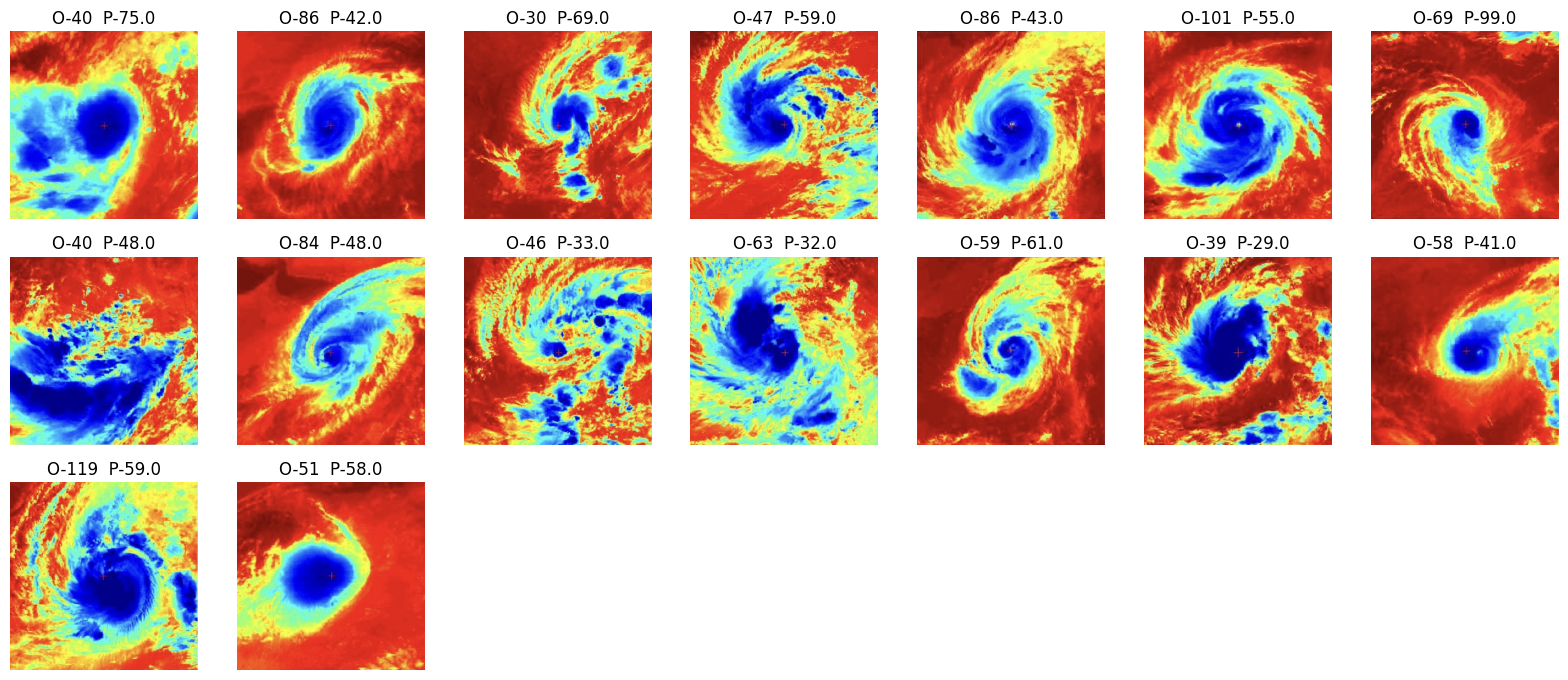

In [47]:
plt.figure(figsize=(20, 20))
for i in range(16):
    cur_img = train_data[0][0][i]
    ax = plt.subplot(7, 7, i + 1)
    plt.title("O-"+str(train_data[0][1][i])+"  P-"+str(pred[i][0].round()))
    plt.imshow(cur_img)
    plt.axis("off")

In [48]:
pred.reshape(-1,)

array([ 74.95,  42.12,  69.1 ,  58.89,  43.18,  54.55,  99.36,  47.88,
        47.55,  33.21,  32.5 ,  61.14,  29.04,  40.92,  59.39,  58.22,
        94.94,  28.01, 102.66,  35.47,  99.75,  43.9 ,  43.92,  60.31,
        27.9 ,  24.3 ,  49.85,  48.3 ,  40.02,  47.3 ,  50.99,  58.39,
        42.64,  62.14,  44.03,  44.14,  84.37,  47.67,  70.34,  82.72,
       111.85,  49.1 ,  63.95,  86.28, 122.11,  29.87,  60.  ,  57.87,
        46.04,  78.39,  49.07,  96.27,  66.98,  24.73,  56.34,  30.58,
        82.81,  76.12,  41.76,  52.44, 103.53,  43.86,  67.81,  89.98,
        46.7 ,  60.14,  41.74,  73.3 ,  35.51,  35.02,  43.73,  81.27,
        81.89,  57.6 ,  32.35, 121.65,  46.32,  69.07,  85.27,  68.81,
        33.24,  53.89,  72.1 ,  79.24,  58.  ,  64.82,  33.09,  61.67,
        87.47,  60.28,  65.43,  45.17,  39.59,  62.8 ,  48.92,  41.02,
        55.46,  55.06, 101.51,  47.83,  51.43,  69.05,  66.11, 112.99,
        54.26,  32.22,  35.01,  33.15,  51.86,  34.83,  49.55,  50.04,
      